## Real world data - Covid 19 data

download data from https://github.com/nytimes/covid-19-data.git

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
us = pd.read_csv('../covid-19-data/us.csv')
us_states = pd.read_csv('../covid-19-data/us-states.csv')
us_counties = pd.read_csv('../covid-19-data/us-counties.csv')

## Line plot

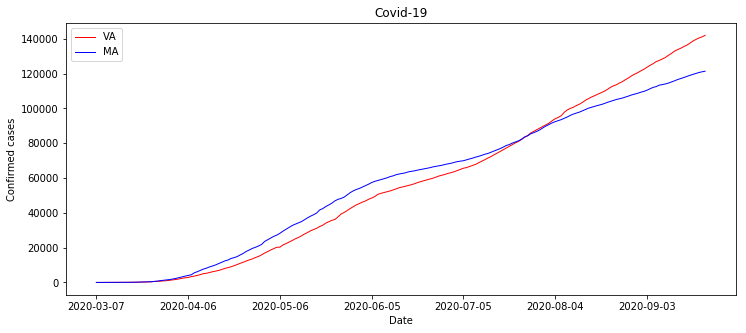

In [4]:
plt.figure(figsize=(12,5))

#plt.plot(us.date, us.cases)
#plt.plot(us.date, us.deaths)

#plt.xticks(us.date[::40])

#plt.show()

VA_case = us_states[us_states['state'] == 'Virginia']
MA_case = us_states[us_states['state'] == 'Maryland']

plt.plot(VA_case.date, VA_case.cases, color='red', linewidth=1, label='VA')
plt.plot(MA_case.date[2:], MA_case.cases[2:], color='blue', linewidth=1, label='MA')

plt.title("Covid-19")
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.legend()

plt.xticks(VA_case.date[::30])

plt.show()

## Bar plot

In [8]:
VA_top15 = us_counties[us_counties['state'] == 'Virginia'].groupby('county').sum().sort_values(by=['cases']).tail(15)

/Users/yingli/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'County')

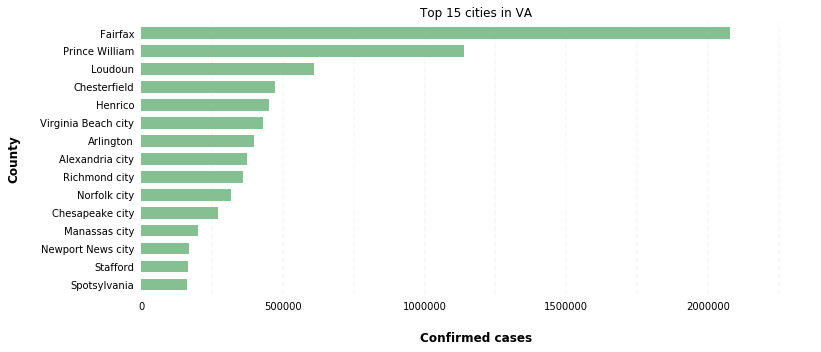

In [10]:
plt.figure(figsize=(12,5))

plt.title("Top 15 cities in VA")
plt.xlabel('Confirmed cases')

ax = VA_top15['cases'].plot(kind='barh', figsize=(12,5), color='#86bf91', zorder=2, width=0.65)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("County", labelpad=20, weight='bold', size=12)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

/Users/yingli/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


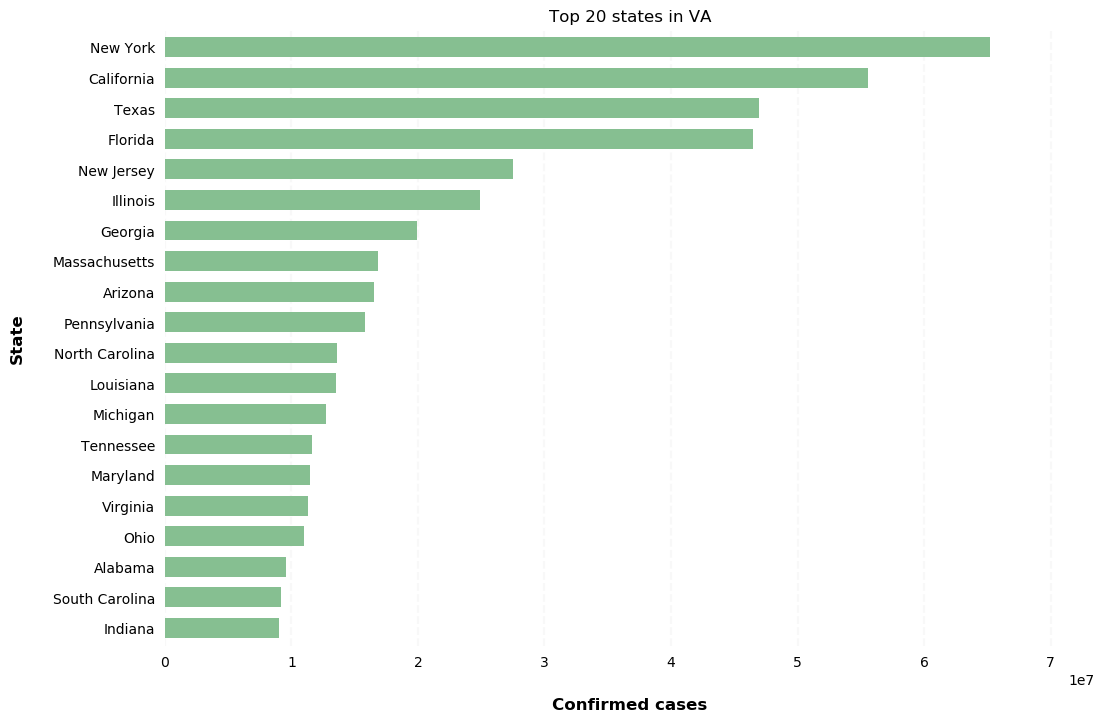

In [23]:
plt.figure(figsize=(12,5))

plt.title("Top 20 states in VA")
US_top20 = us_states.groupby('state').sum().sort_values(by=['cases']).tail(20)

ax = US_top20['cases'].plot(kind='barh', figsize=(12,8), color='#86bf91', zorder=2, width=0.65)
#ax2 = US_top20['deaths'].plot(kind='barh', figsize=(12,8), color='#86bf91', zorder=2, width=0.85)
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Confirmed cases", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("State", labelpad=20, weight='bold', size=12)

# Format y-axis label
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

# save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('bar_top20_state.png', dpi=300)

### Pie chart

#### Mask-Wearing Survey Data

The New York Times is releasing estimates of mask usage by county in the United States.

This data comes from a large number of interviews conducted online by the global data and survey firm Dynata at the request of The New York Times. The firm asked a question about mask use to obtain 250,000 survey responses between July 2 and July 14, enough data to provide estimates more detailed than the state level. (Several states have imposed new mask requirements since the completion of these interviews.)

Specifically, each participant was asked: How often do you wear a mask in public when you expect to be within six feet of another person?

This survey was conducted a single time, and at this point we have no plans to update the data or conduct the survey again.

#### Methodology
To transform raw survey responses into county-level estimates, the survey data was weighted by age and gender, and survey respondents’ locations were approximated from their ZIP codes. Then estimates of mask-wearing were made for each census tract by taking a weighted average of the 200 nearest responses, with closer responses getting more weight in the average. These tract-level estimates were then rolled up to the county level according to each tract’s total population.

By rolling the estimates up to counties, it reduces a lot of the random noise that is seen at the tract level. In addition, the shapes in the map are constructed from census tracts that have been merged together — this helps in displaying a detailed map, but is less useful than county-level in analyzing the data.

In [12]:
mask_use = pd.read_csv('../covid-19-data/mask-use/mask-use-by-county.csv')
#mask_use_least = mask_use.sort_values(by=['ALWAYS']).head(1)
#mask_use_most = mask_use.sort_values(by=['ALWAYS']).tail(1)
mask_use_ave = mask_use.mean().to_numpy()

In [13]:
mean = mask_use.drop(['COUNTYFP'],axis=1).mean().to_numpy()

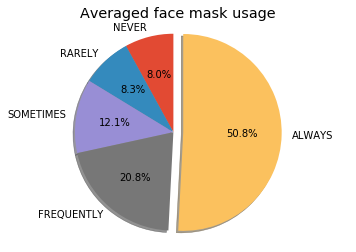

In [14]:
plt.style.use('ggplot')
plt.title('Averaged face mask usage')
#fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0.1) 
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']
plt.pie(mean, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Whiskers plot

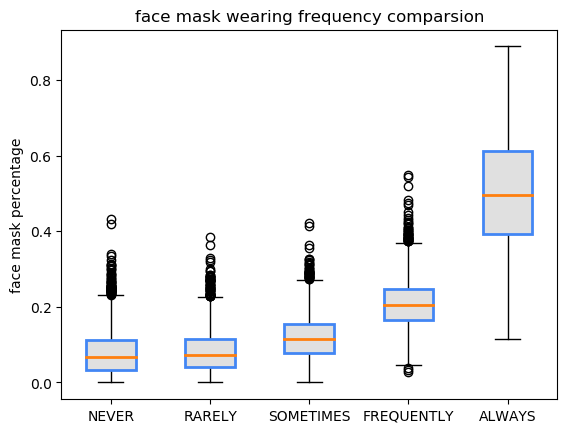

In [17]:
x = mask_use.drop(['COUNTYFP'],axis=1).to_numpy()

plt.style.use('default')
labels = ['NEVER', 'RARELY','SOMETIMES','FREQUENTLY','ALWAYS']

plt.title('face mask wearing frequency comparsion')
plt.ylabel('face mask percentage')

boxes = plt.boxplot(x, labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)
    
    # Change Fill Color
    box.set(facecolor='#e0e0e0')
    
plt.show()